In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://www.imdb.com/chart/top/"
response = requests.get(url)
html = response.text 

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, "html.parser") #Converting HTML to structured tree

In [ ]:
'''
<h3 class="ipc-title__text ipc-title__text--reduced">1. The Shawshank Redemption</h3>flex
<div class="sc-15ac7568-6
<div class="sc-17ce9e4b-0 ddMjUi sc-15ac7568-2 kzodIA cli-ratings-container" data-testid="ratingGroup--container">flex
<span class="sc-15ac7568-1 jYDzG">flex fqJJPW cli-title-metadata">…</div>
'''
#Sample of the HTML code used to represent Movie titles, release date, rating etc..


'\n<h3 class="ipc-title__text ipc-title__text--reduced">1. The Shawshank Redemption</h3>flex\n<div class="sc-15ac7568-6\n<div class="sc-17ce9e4b-0 ddMjUi sc-15ac7568-2 kzodIA cli-ratings-container" data-testid="ratingGroup--container">flex\n<span class="sc-15ac7568-1 jYDzG">flex fqJJPW cli-title-metadata">…</div>\n'

In [ ]:
movies = []
for item in movies_data: #Extracting the relevant information
    node = item["node"]
    title = node["titleText"]["text"]
    year = node["releaseYear"]["year"] if node.get("releaseYear") else None
    rating = node["ratingsSummary"]["aggregateRating"]
    votes = node["ratingsSummary"]["voteCount"]

  # Extract genres (joining multiple if available)
    if node.get("titleGenres") and node["titleGenres"].get("genres"):
        genres = ", ".join([g["genre"]["text"] for g in node["titleGenres"]["genres"]])
    else:
        genres = None
    
    movies.append([title, year, rating, votes,genres])

df = pd.DataFrame(movies, columns=["Title", "Year", "Rating", "Votes","Genres"]) #Creating the dataframe

print("Movies extracted:", len(df))
print(df.head()) #First five movie titles

Movies extracted: 250
                      Title  Year  Rating    Votes                Genres
0  The Shawshank Redemption  1994     9.3  3093135                 Drama
1             The Godfather  1972     9.2  2156321          Crime, Drama
2           The Dark Knight  2008     9.1  3068618  Action, Crime, Drama
3    The Godfather: Part II  1974     9.0  1449532          Crime, Drama
4              12 Angry Men  1957     9.0   946430          Crime, Drama


In [ ]:
df.head()

,Title,Year,Rating,Votes,Genres
0,The Shawshank Redemption,1994,9.3,3093135,Drama
1,The Godfather,1972,9.2,2156321,"Crime, Drama"
2,The Dark Knight,2008,9.1,3068618,"Action, Crime, Drama"
3,The Godfather: Part II,1974,9.0,1449532,"Crime, Drama"
4,12 Angry Men,1957,9.0,946430,"Crime, Drama"


In [ ]:
df.to_csv("imdb_top_250.csv", index=False, encoding="utf-8")
#Converting the data into a csv file

In [ ]:
df.head()

,Title,Year,Rating,Votes,Genres
0,The Shawshank Redemption,1994,9.3,3093135,Drama
1,The Godfather,1972,9.2,2156321,"Crime, Drama"
2,The Dark Knight,2008,9.1,3068618,"Action, Crime, Drama"
3,The Godfather: Part II,1974,9.0,1449532,"Crime, Drama"
4,12 Angry Men,1957,9.0,946430,"Crime, Drama"


In [ ]:
df.isna().sum()

Title     0
Year      0
Rating    0
Votes     0
Genres    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   250 non-null    object 
 1   Year    250 non-null    int64  
 2   Rating  250 non-null    float64
 3   Votes   250 non-null    int64  
 4   Genres  250 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ KB


we can see no null values exist, i.e. no missing ratings

In [ ]:
#Finding average votes by year

In [ ]:
votes_by_year = df.groupby("Year")["Votes"].mean().reset_index() #Grouping year with mean of votes
print(votes_by_year.head())

NameError: name 'df' is not defined

In [ ]:
#Graphical representation of average values by year

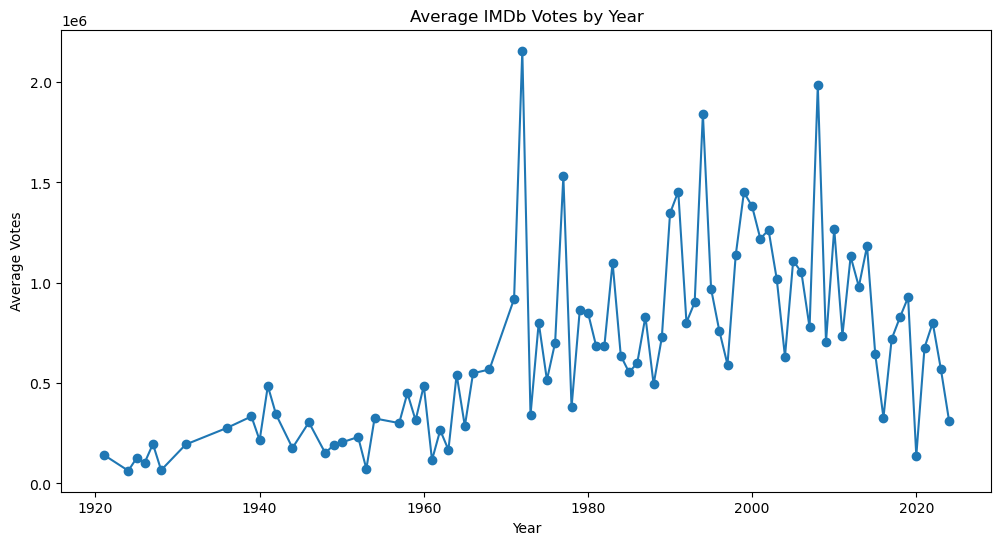

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(votes_by_year["Year"], votes_by_year["Votes"], marker="o")
plt.title("Average IMDb Votes by Year")
plt.xlabel("Year")
plt.ylabel("Average Votes")
plt.show()

In [ ]:
#To find average votes by genre we have to make multiple copies of a movie, with each row having only one genre 

In [ ]:
df['Genres'].info

<bound method Series.info of 0        Drama
1        Crime
2        Drama
3       Action
4        Crime
        ...   
639      Drama
640    Mystery
641     Comedy
642      Drama
643    Fantasy
Name: Genres, Length: 644, dtype: category
Categories (21, object): ['Action', 'Adventure', 'Animation', 'Biography', ..., 'Sport', 'Thriller', 'War', 'Western']>

In [ ]:
df['Genres'] = df['Genres'].str.split(', ') #Converting each element of genre to an element of a list

In [ ]:
df['Genres'].head()

0                   [Drama]
1            [Crime, Drama]
2    [Action, Crime, Drama]
3            [Crime, Drama]
4            [Crime, Drama]
Name: Genres, dtype: object

In [ ]:
df = df.explode('Genres').reset_index(drop = True) #Make each genre of a movie a seperate row

In [ ]:
df.head()

,Title,Year,Rating,Votes,Genres
0,The Shawshank Redemption,1994,9.3,3093135,Drama
1,The Godfather,1972,9.2,2156321,Crime
2,The Godfather,1972,9.2,2156321,Drama
3,The Dark Knight,2008,9.1,3068618,Action
4,The Dark Knight,2008,9.1,3068618,Crime


we can see how movies are repeated based on their genres

In [ ]:
#Lets convert each genre into a seperate category 

In [ ]:
df['Genres'] = df['Genres'].astype("category")

In [ ]:
df['Genres'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
                  'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
                  'History', 'Horror', 'Music', 'Musical', 'Mystery',
                  'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.nunique()

Title     250
Year       85
Rating     14
Votes     250
Genres     21
dtype: int64

In [ ]:
#We can see we have 21 genres

In [ ]:
avg_votes_by_genre = df.groupby("Genres")["Votes"].mean().sort_values(ascending=False) #Grouping the genres with votes and finding their mean
print(avg_votes_by_genre)

Genres
Sci-Fi       1.252717e+06
Fantasy      1.065527e+06
Action       9.717844e+05
Crime        9.459008e+05
Adventure    9.113526e+05
Horror       8.951128e+05
Thriller     8.023506e+05
Music        7.078620e+05
Drama        7.063875e+05
Animation    6.741773e+05
Western      6.583083e+05
Biography    6.388409e+05
Mystery      6.235242e+05
Comedy       5.866854e+05
History      5.522221e+05
Sport        4.955547e+05
War          4.889795e+05
Romance      4.692280e+05
Family       4.664269e+05
Musical      2.757260e+05
Film-Noir    2.068090e+05
Name: Votes, dtype: float64


/var/folders/fd/2fthql2x537_1rdfmxy7zgjm0000gn/T/ipykernel_75725/1741741946.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_votes_by_genre = df.groupby("Genres")["Votes"].mean().sort_values(ascending=False) #Grouping the genres with votes and finding their mean


In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)
print(avg_votes_by_genre)

Genres
Sci-Fi      1252716.60
Fantasy     1065527.06
Action       971784.45
Crime        945900.81
Adventure    911352.59
Horror       895112.75
Thriller     802350.56
Music        707862.00
Drama        706387.53
Animation    674177.31
Western      658308.33
Biography    638840.93
Mystery      623524.16
Comedy       586685.36
History      552222.11
Sport        495554.67
War          488979.48
Romance      469228.04
Family       466426.92
Musical      275726.00
Film-Noir    206809.00
Name: Votes, dtype: float64


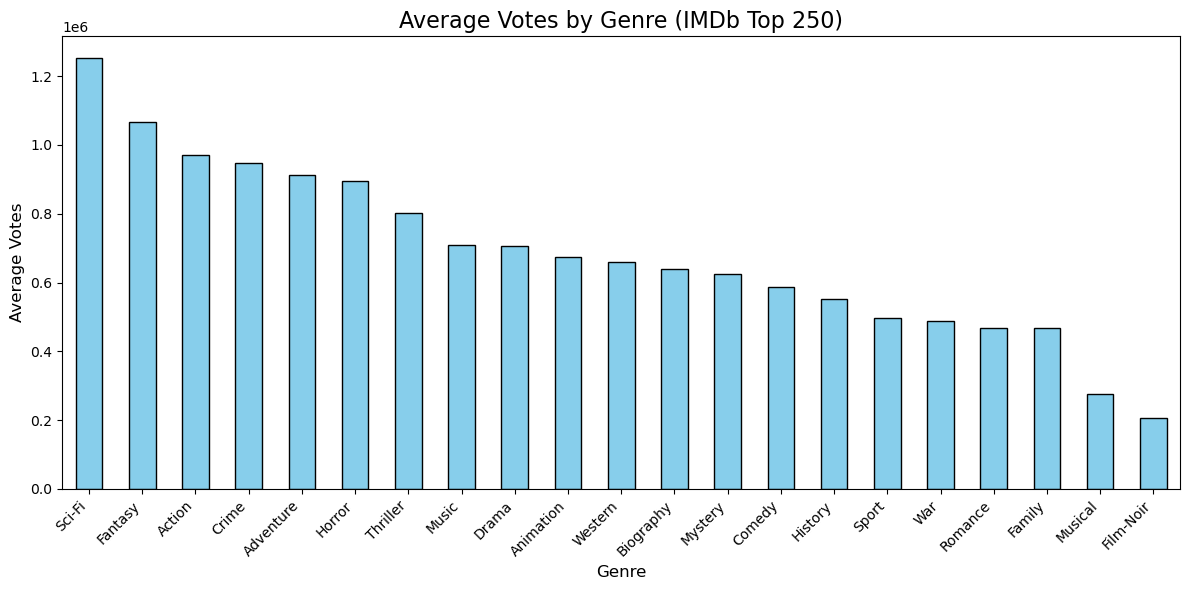

In [ ]:
#Plotting the graphs of the genres vs avg
plt.figure(figsize=(12,6))
avg_votes_by_genre.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Votes by Genre (IMDb Top 250)", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Votes", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Title,Year,Rating,Votes,Genres
0,The Shawshank Redemption,1994,9.30,3093135,Drama
1,The Godfather,1972,9.20,2156321,Crime
2,The Godfather,1972,9.20,2156321,Drama
3,The Dark Knight,2008,9.10,3068618,Action
4,The Dark Knight,2008,9.10,3068618,Crime


In [ ]:
#Some other visuals we can find from the dataset

In [ ]:
#Average rating per genre 

In [ ]:
avg_rating_by_genre = df.groupby("Genres")["Rating"].mean().sort_values(ascending=False)
print(avg_rating_by_genre.head())

Genres
Western   8.40
Music     8.40
Fantasy   8.40
Crime     8.36
Sci-Fi    8.36
Name: Rating, dtype: float64


/var/folders/fd/2fthql2x537_1rdfmxy7zgjm0000gn/T/ipykernel_75725/2127183890.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_genre = df.groupby("Genres")["Rating"].mean().sort_values(ascending=False)


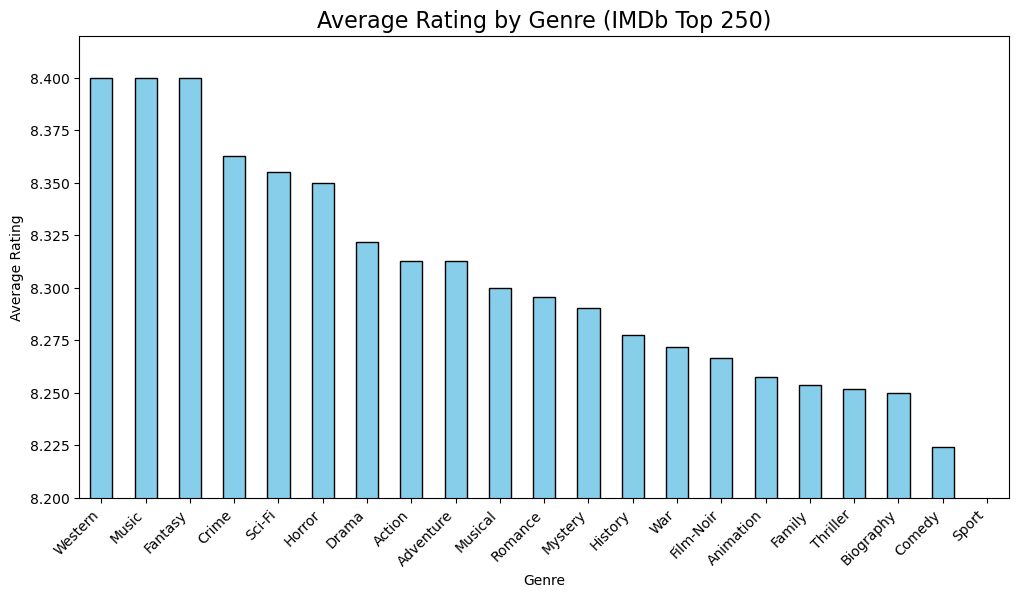

In [ ]:
plt.figure(figsize=(12,6))
avg_rating_by_genre.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Rating by Genre (IMDb Top 250)", fontsize=16)
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.xticks(rotation=45, ha="right")
plt.ylim(8.2,8.42)
plt.show()

In [ ]:
#Votings vs Ratings Scatterplot

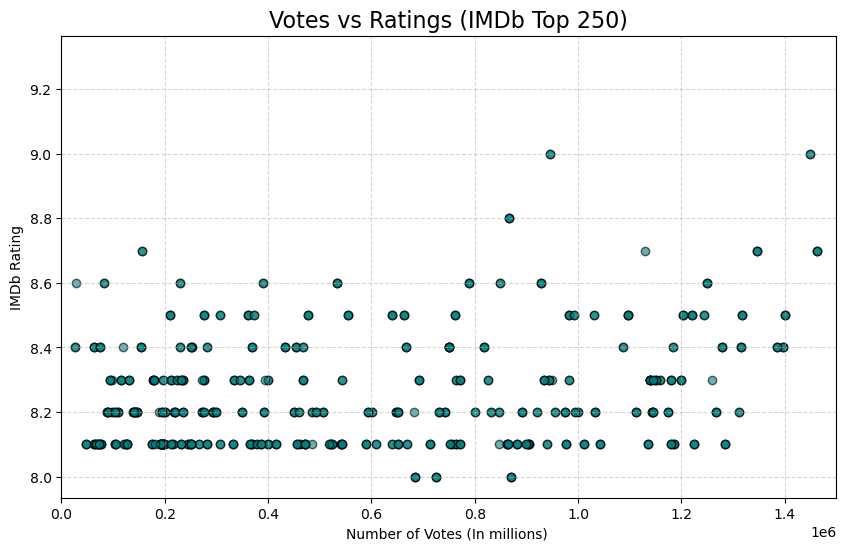

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["Votes"], df["Rating"], alpha=0.6, color="teal", edgecolor="black")
plt.title("Votes vs Ratings (IMDb Top 250)", fontsize=16)
plt.xlabel("Number of Votes (In millions) ")
plt.ylabel("IMDb Rating")
plt.xlim(0, 1_500_000)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
#Top 10 most rated movies 

In [ ]:
#First lets remap all genres of a movie to a the single title they belong to 

In [ ]:
unique_movies = df.drop_duplicates(subset="Title")
top_voted = unique_movies.sort_values(by="Votes", ascending=False).head(10)

In [ ]:
print(top_voted)

                                                Title  Year  Rating    Votes  \
0                            The Shawshank Redemption  1994    9.30  3093135   
3                                     The Dark Knight  2008    9.10  3068618   
32                                          Inception  2010    8.80  2725667   
29                                         Fight Club  1999    8.80  2509710   
24                                       Forrest Gump  1994    8.80  2415383   
43                                       Interstellar  2014    8.70  2399323   
16                                       Pulp Fiction  1994    8.80  2365990   
38                                         The Matrix  1999    8.70  2183787   
1                                       The Godfather  1972    9.20  2156321   
18  The Lord of the Rings: The Fellowship of the Ring  2001    8.90  2137326   

       Genres  
0       Drama  
3      Action  
32     Action  
29      Crime  
24      Drama  
43  Adventure  
16     

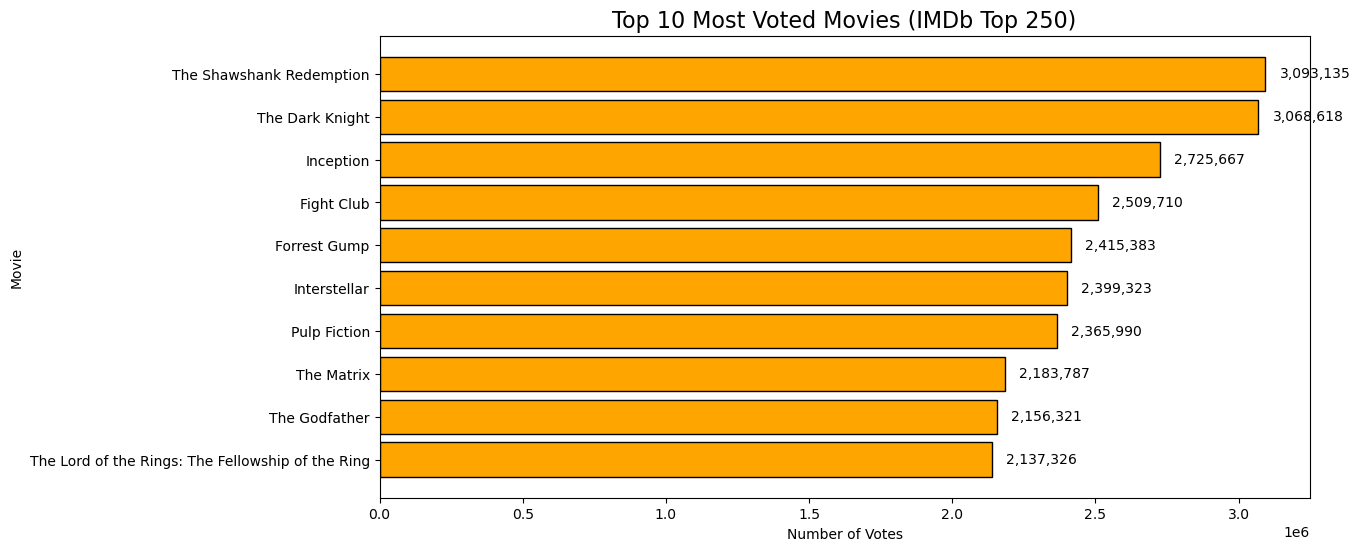

In [ ]:
plt.figure(figsize=(12,6))
plt.barh(top_voted["Title"], top_voted["Votes"], color="orange", edgecolor="black")
plt.title("Top 10 Most Voted Movies (IMDb Top 250)", fontsize=16)
plt.xlabel("Number of Votes")
plt.ylabel("Movie")
plt.gca().invert_yaxis()
for i, v in enumerate(top_voted["Votes"]):
    plt.text(v + 50_000, i, f"{v:,}", va="center")

plt.show()